<a href="https://colab.research.google.com/github/to6ksu3a/data-science-salaries-analysis/blob/main/DS_Salaries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ зарплат специалистов в области Data Science

**Автор**: Колпакова Ксения - https://github.com/to6ksu3a

**Дата**: октябрь 2025


**Цель работы**: комплексный анализ рынка труда data-специалистов и выяление главных факторов, влияющих на уровень заработных плат


**Источник датасета**: Kaggle (https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)

Для обеспечения надежности и доступности данных их чтение осуществляется по ссылке на мой GitHub.

## 1. Импорт библиотек

In [431]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Загрузка датасета

In [432]:
try:
  data = pd.read_csv('https://raw.githubusercontent.com/to6ksu3a/Data-Science-Salary-Analysis/refs/heads/main/ds_salaries.csv')
  print('Файл успешно загружен')
except Exception as e:
  raise Exception(f"Не удалось загрузить файл 'ds_salaries.csv'. Ошибка: {e}")

Файл успешно загружен


##3. EDA





In [433]:
data.shape

(3755, 11)

In [434]:
data.columns.values

array(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'], dtype=object)

In [435]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [436]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [437]:
data.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


Таким образом, в датасете 11 колонок и 3755 рядов.



Объяснение значений:
* work_year: год, за который была выплачена зарплата.
* experience_level: уровень опыта работы в течение года.
* employment_type: тип занятости на данной должности.
* job_title: должность в течение года.
* salary: общая сумма выплаченной зарплаты до вычета налогов.
* salary_currency: валюта, в которой была выплачена зарплата, в виде кода валюты по стандарту ISO 4217.
* salary_in_usd: зарплата в долларах США
* employee_residence: основная страна проживания сотрудника в течение рабочего года в соответствии с кодом страны ISO 3166.
* remote_ratio: общий объем работы, выполненной удаленно
* company_location: страна, в которой находится главный офис или филиал компании-работодателя
* company_size: среднее количество сотрудников, работавших в компании в течение года

Всего 4 колонки являются целочисленными: work_year, salary, salary_in_usd, remote_ratio

Остальные 7 состоят из объектов (experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, company_size)


###3.1. Проверка нулевых и пропущенных значений

In [438]:
data.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Нет пропущенных значений, которые нужно было бы обработать

###3.2. Уникальные значения и дубликаты

In [440]:
data.nunique()

,0
work_year,4
experience_level,4
employment_type,4
job_title,93
salary,815
salary_currency,20
salary_in_usd,1035
employee_residence,78
remote_ratio,3
company_location,72


In [441]:
unique_values_el = data['experience_level'].unique()
print(unique_values_el)

['SE' 'MI' 'EN' 'EX']


`experience_level` (опыт) имеет 4 уровня:
* EN - Entry-level / Junior
* MI - Mid-level / Intermediate
* SE - Senior-level / Expert
* EX - Executive-level / Director

In [442]:
unique_values_et = data['employment_type'].unique()
print(unique_values_et)

['FT' 'CT' 'FL' 'PT']


В датасете представлено 4 типа трудоустройства (`employment_type`)
* PT - Part-time
* FT - Full-time
* CT - Contract
* FL - Freelance

In [443]:
unique_values_rr = data['remote_ratio'].unique()
print(unique_values_rr)

[100   0  50]


`remote_ratio` (коэффициент удаленной работы):
* 100% - полная удаленка
* 50% - гибрид
* 0% - очная работа

In [444]:
unique_values_cs = data['company_size'].unique()
print(unique_values_cs)

['L' 'S' 'M']


`company_size` (размер компании):
* L - large (большая)
* M - medium (средняя)
* S - small (маленькая)

In [445]:
data.duplicated().sum()

np.int64(1171)

In [446]:
duplicates = data[data.duplicated(keep=False)]  # keep=False показывает все копии
print("Все дубликаты:\n")
print(duplicates.sort_values(by=list(data.columns)))

Все дубликаты:

      work_year experience_level employment_type           job_title   salary  \
3119       2020               EN              FT       Data Engineer  1000000   
3120       2020               EN              FT       Data Engineer  1000000   
3502       2021               MI              FT       Data Engineer   200000   
3586       2021               MI              FT       Data Engineer   200000   
3665       2021               MI              FT      Data Scientist    76760   
...         ...              ...             ...                 ...      ...   
525        2023               SE              FT  Research Scientist   250000   
956        2023               SE              FT  Research Scientist   250000   
1751       2023               SE              FT  Research Scientist   250000   
1247       2023               SE              FT  Research Scientist   253750   
1249       2023               SE              FT  Research Scientist   253750   

     salary

In [447]:
full_dups = data[data.duplicated(keep=False)]
full_dup_count = len(full_dups) - data.duplicated().sum()
print(f"Полные дубликаты: {full_dup_count}")

Полные дубликаты: 544


Так как в датасете нет персональных и подобных данных, которые могли бы указывать на излишность дубликатов, то допускается, что они не являются технической или какой-либо другой ошибкой, а достоверно отражают реальную ситуацию

###3.3. Анализ статистики по данным столбцов

In [448]:
data.describe(include="object")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [449]:
us_dominance = {
    'employee_residence': round(3004/3755 * 100, 3),
    'company_location': round(3040/3755 * 100, 3),
    'salary_currency': round(3224/3755 * 100, 3)
}
us_dominance

{'employee_residence': 80.0,
 'company_location': 80.959,
 'salary_currency': 85.859}

Данные сильно основываются (80+%) на информации из США.

In [450]:
experience_distribution = {
    'SE' : round(2516/3755 * 100, 3),
    'Other levels': round((3755-2516)/3755 * 100, 3)
}
experience_distribution

{'SE': 67.004, 'Other levels': 32.996}

Senior-специалисты (SE) составляют 67% выборки

In [451]:
employment_stats = {
    'FT': round(3718/3755 * 100, 3),
    'Other types': round((3755-3718)/3755 * 100, 3)
}
employment_stats

{'FT': 99.015, 'Other types': 0.985}

Полная занятость (FT) составляет 99%, остальные формы занятости практически не представлены

In [452]:
top_roles = {
    'Data Engineer': round(1040/3755 * 100, 3),
    'Other 92 roles': round((3755-1040)/3755 * 100, 3)
}
top_roles

{'Data Engineer': 27.696, 'Other 92 roles': 72.304}

Data Engineer — самая частая роль (27,7%), но есть еще 92 должности, это говорит о разнообразии ролей в данных.

In [453]:
companies = {
    'M (medium)': round(3153/3755 * 100, 3),
    'Small and Large companies': round((3755-3153)/3755 * 100, 3)
}
companies

{'M (medium)': 83.968, 'Small and Large companies': 16.032}

Преобладают компании среднего размера

In [454]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Временной период данных ( `work_year` ):
* 2020-2021 представляют менее 25% данных, т.к. 25% квантиль = 2022
* 2022 - около 50% (медиана + концентрация вокруг среднего)
* 2023 - около 25% данных.

Таким образом, 75% данных собраны за 2 года (2022-2023)

Распределение зарплат ( `salary_in_usd` ):
* Среднее (137K) ≈ Медиана (135K), т.е. типичная зарплата в диапазоне 135,000-137,000 USD.
* Стандартное отклонение равно 63К, высокая вариативность зарплат ((63055/137570)*100 = 45.83%), что ожидаемо для разных уровней и ролей
* min, max: 450000 USD / 5132 USD = 87.7x - огромный разбос, который, скорее всего, объясняется тем, что нижнее значение относится к частичной занятостью с минимальной зарплатой, а верхняя говорит о высокой экспертностью или узкой специализацией работника с максимальной зарплатой

Удаленная работа ( `remote_ratio` ):
* Два основных кластера (0% - полностью офис, 100% - полная удаленка), медиана = 0, но 75% перцентиль = 100, что указывает на бимодальное распределение
* Высокий std подтверждает поляризацию данных, поэтому среднее значение не отражает настоящую ситуацию




---



**Выводы, которые можно сделать по статистическим данным по столбцам**:
1. Данные сильно сфокусированы на США (80%+). Это ограничит возможность сделать глобальные выводы
2. Преобладают senior-специалисты (67%)
3. Подавляющее большинство - полноценная занятость, что типично для корпоративных данных.
4. Data Engineer - самая частая роль, но есть значительное разнообразие (93 уникальные должности)
5. Компании предпочитают либо полностью офис, либо полностью удаленный формат
6. Рынок демонстрирует предсказуемую структуру зарплат

### 3.4. Предобработка данных

Так как совокупность признаков `salary` и `salary_currency` дублирует информацию столбца `salary_in_usd`, можно удалить столбцы с зарплатой в местной валюте.

In [455]:
data = data.drop(['salary', 'salary_currency'], axis=1)

In [456]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


###3.5. Формирование гипотез

**Гипотезы**:
1. **Влияние опыта на зарплату**: Senior специалисты получают больше. 67% данных - SE уровень, при симметричном распределении зарплат.
2. **Удаленная работа влияет на зарплату**: Бимодальное распределение remote_ratio (0% или 100%), сравнить зарплаты удаленщиков и тех, кто работает в офисе
3. **Зарплаты в США выше чем в других странах**: 80%+ данных по US, но есть 78 уникальных стран резидентства.
4. **Рост зарплат с 2020 по 2023**: Данные охватывают 2020-2023, рынок данных развивался.
5. **Крупные компании платят больше**: 83.97% данных - medium компании, но есть S и L
6. **Data Engineers наиболее высокооплачиваемы**: 27.7% данных - Data Engineers, самая частая роль.

## 4. Визуализация

### 4.1. Простые графики для общего понимания данных

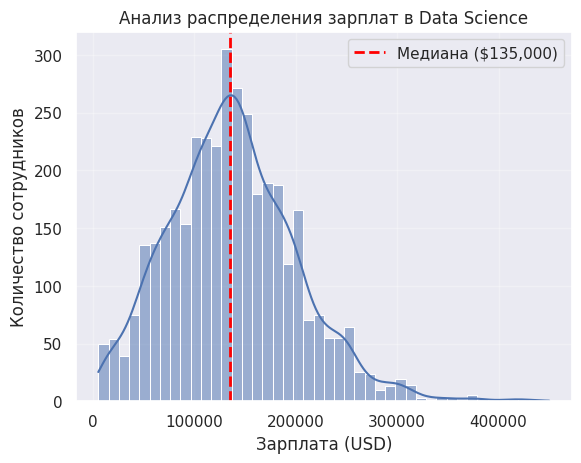

In [457]:
sns.histplot(data['salary_in_usd'], kde=True, edgecolor='white')

median_salary = data['salary_in_usd'].median()
plt.axvline(median_salary, color='red', linestyle='--', linewidth=2,
           label=f'Медиана (${median_salary:,.0f})')

plt.title('Анализ распределения зарплат в Data Science')
plt.xlabel('Зарплата (USD)')
plt.ylabel('Количество сотрудников')
plt.legend()
plt.grid(True, alpha=0.3)


Text(0.5, 0, 'Зарплата (USD)')

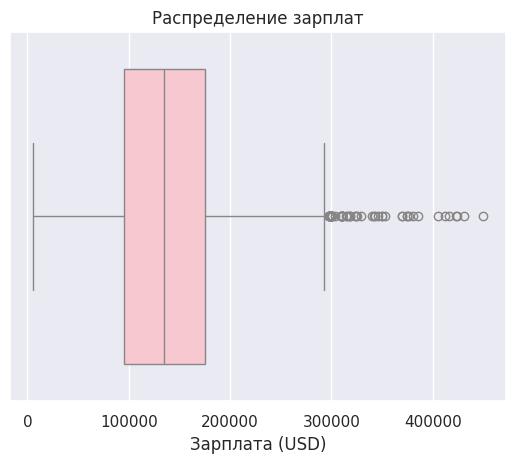

In [458]:
sns.boxplot(x=data['salary_in_usd'], color='pink')
plt.title('Распределение зарплат')
plt.xlabel('Зарплата (USD)')

Большинство зарплат находятся в диапазоне от 90 000 до 170 000 USD, однако присутствует заметное количество высокооплачиваемых специалистов с зарплатами свыше 300 000 USD, что создаёт перекос распределения

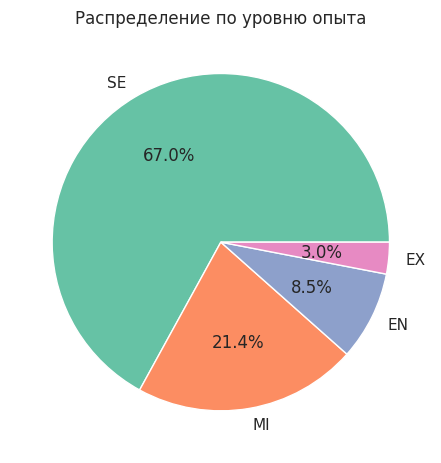

In [459]:
level_counts = data['experience_level'].value_counts()

plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2") )
plt.title('Распределение по уровню опыта')

plt.tight_layout()
plt.show()

Как и говорилось выше, преобладают Senior-работники, наименьшую долю представляют Executive-работники, т.е. директоры/начальники

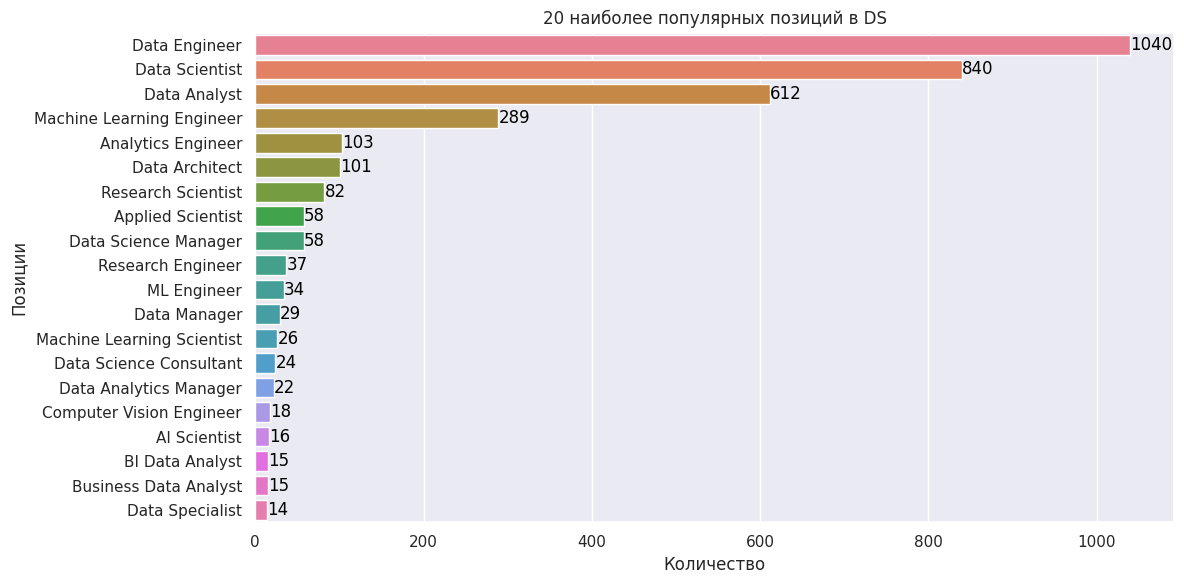

In [460]:
plt.figure(figsize=(12, 6))
job_counts = data['job_title'].value_counts()

top_20_jobs = job_counts.head(20)
top_20_df= pd.DataFrame({'Job Title': top_20_jobs.index, 'Count': top_20_jobs.values})

sns.set(style="darkgrid")
ax = sns.barplot(data=top_20_df, x='Count', y='Job Title',
                  hue='Job Title', palette='husl', legend=False)

for i, v in enumerate(top_20_df['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.xlabel('Количество')
plt.ylabel('Позиции')
plt.title('20 наиболее популярных позиций в DS')

plt.tight_layout()
plt.show()

Data Engineer, Data Scientist, Data Analyst составляют 65%-70% процентов от всех позиций. Это явно выделяющийся эшелон.

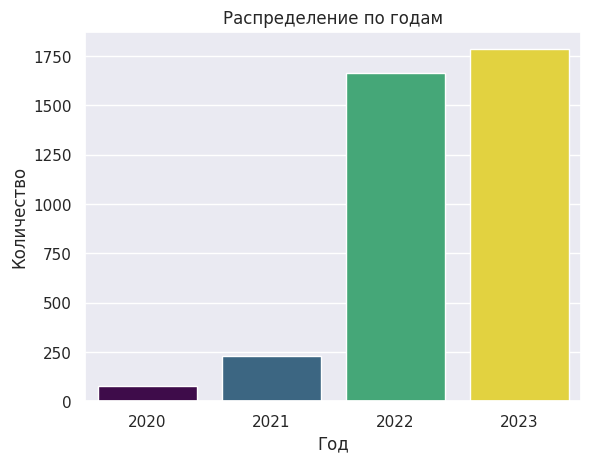

In [461]:
sns.countplot(x='work_year', data=data, hue='work_year', palette='viridis', legend=False)
plt.title('Распределение по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

Большую часть составляют данные за недавние года (2022-2023)

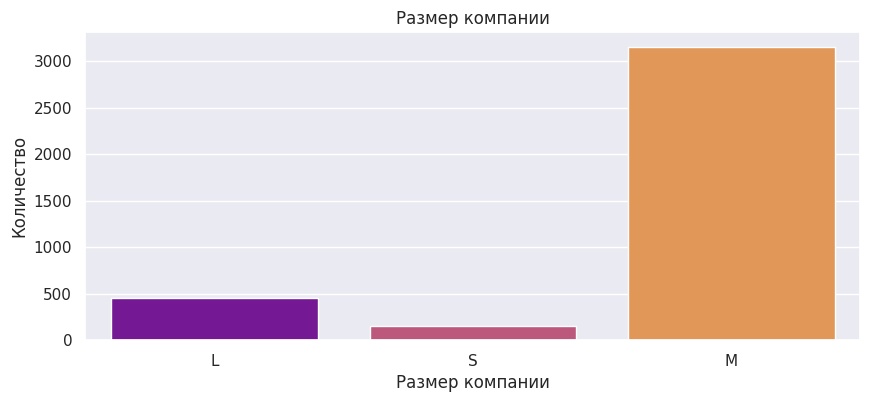

In [462]:
plt.figure(figsize=[10,4])
sns.countplot(x='company_size', data=data, hue='company_size', palette='plasma', legend=False)
plt.title('Размер компании')
plt.xlabel('Размер компании')
plt.ylabel('Количество')
plt.show()

Средние компании составляют наибольшую долю, также представлены и около 15% крупных компаний, что ожидаемо для индустрии. В то же время график показывает недостаток малого бизнеса в выборке

Распределение по уровням опыта:
Категория  Количество   Процент
       FT        3718 99.014647
       PT          17  0.452730
       CT          10  0.266312
       FL          10  0.266312


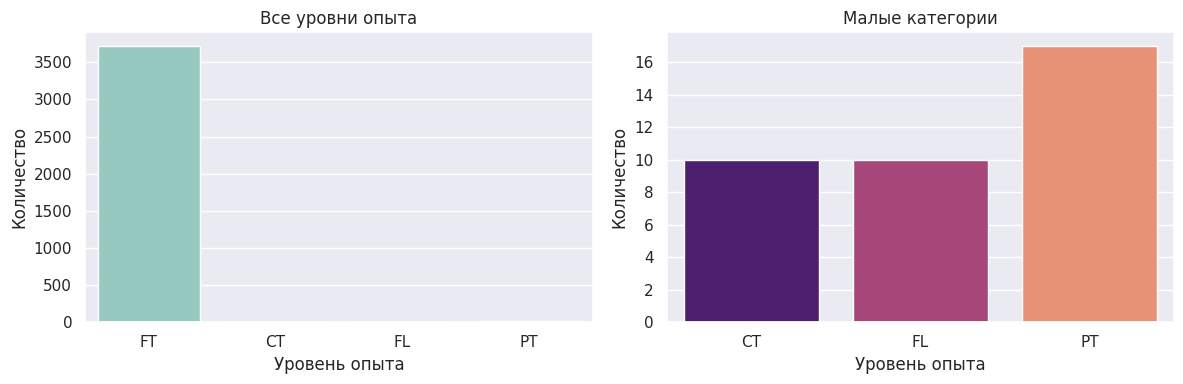

In [463]:
level_counts = data['employment_type'].value_counts()
level_percents = data['employment_type'].value_counts(normalize=True) * 100

summary_df = pd.DataFrame({
    'Категория': level_counts.index,
    'Количество': level_counts.values,
    'Процент': level_percents.values
})

print("Распределение по уровням опыта:")
print(summary_df.to_string(index=False))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# все данные
sns.countplot(x='employment_type', data=data, hue='employment_type',
              palette='Set3', legend=False, ax=ax1)
ax1.set_title('Все уровни опыта')
ax1.set_xlabel('Уровень опыта')
ax1.set_ylabel('Количество')

# без наибольшей категории
filtered_data = data[data['employment_type'] != 'FT']
sns.countplot(x='employment_type', data=filtered_data, hue='employment_type',
              palette='magma', legend=False, ax=ax2)
ax2.set_title('Малые категории')
ax2.set_xlabel('Уровень опыта')
ax2.set_ylabel('Количество')

plt.tight_layout()
plt.show()

При безусловном преобладании полного рабочего дня среди миноритарных категорий лидирует частичная занятость по сравнению с равными контрактом и фрилансом

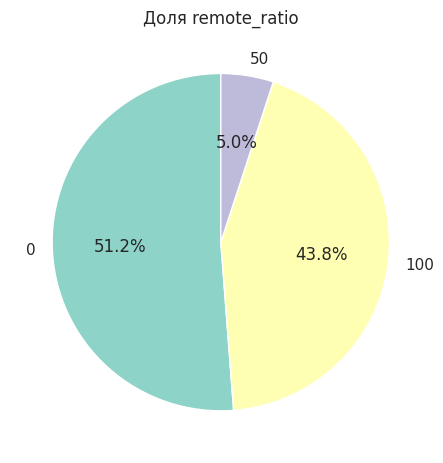

In [464]:
remote_counts = data['remote_ratio'].value_counts()
plt.pie(remote_counts.values, labels=remote_counts.index,
        autopct='%1.1f%%', colors=sns.color_palette("Set3"),
        startangle=90)
plt.title('Доля remote_ratio')

plt.tight_layout()
plt.show()

В рассматриваемой выборке преобладают крайние формы занятости — либо полностью удалённая, либо полностью офисная работа, гибридный формат встречается редко

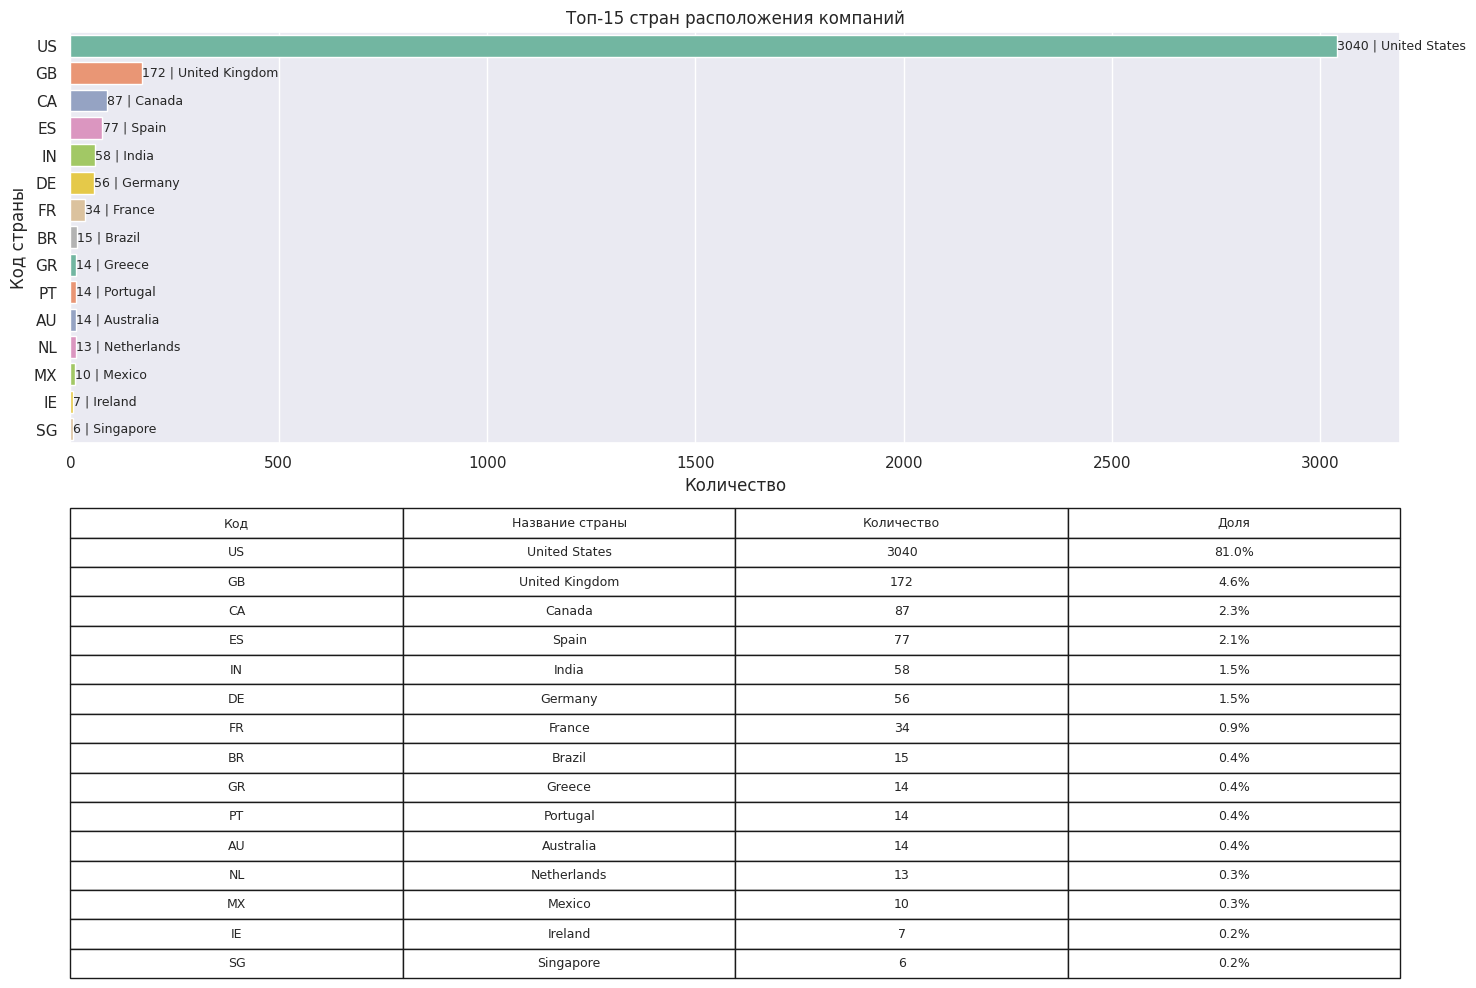

In [465]:
plt.figure(figsize=[15,10])

top_locations = data['company_location'].value_counts().head(15)

country_codes = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'CA': 'Canada',
    'ES': 'Spain',
    'IN': 'India',
    'DE': 'Germany',
    'FR': 'France',
    'BR': 'Brazil',
    'PT': 'Portugal',
    'NL': 'Netherlands',
    'AU': 'Australia',
    'MX': 'Mexico',
    'GR': 'Greece',
    'PL': 'Poland',
    'UA': 'Ukraine',
    'IE': 'Ireland',
    'SG': 'Singapore'
}

plt.subplot(2,1,1)
ax = sns.barplot(x=top_locations.values, y=top_locations.index,
                 hue=top_locations.index, palette='Set2', legend=False)
plt.title('Топ-15 стран расположения компаний')
plt.xlabel('Количество')
plt.ylabel('Код страны')

for i, (country_code, count) in enumerate(zip(top_locations.index, top_locations.values)):
    full_name = country_codes.get(country_code, country_code)
    ax.text(count + 0.1, i, f'{count} | {full_name}', va='center', fontsize=9)

plt.subplot(2,1,2)
table_data = []

for country_code in top_locations.index:
    full_name = country_codes.get(country_code, 'Unknown')
    count = top_locations[country_code]
    percentage = (count / len(data)) * 100
    table_data.append([country_code, full_name, count, f"{percentage:.1f}%"])

table = plt.table(cellText=table_data,
                 colLabels=['Код', 'Название страны', 'Количество', 'Доля'],
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)
plt.axis('off')

plt.tight_layout()
plt.show()

Основная часть компаний, где работают data-специалисты, сосредоточена в США.
Европейские страны, Канада и Индия также присутствуют на рынке, но их доля значительно меньше. Это может говорить как о глобальной централизации индустрии данных в США, так и о большем количестве американских компаний, нанимающих специалистов по всему миру.

###4.2. Исследование корреляций

###4.2.1. Влияние опыта на зарплату

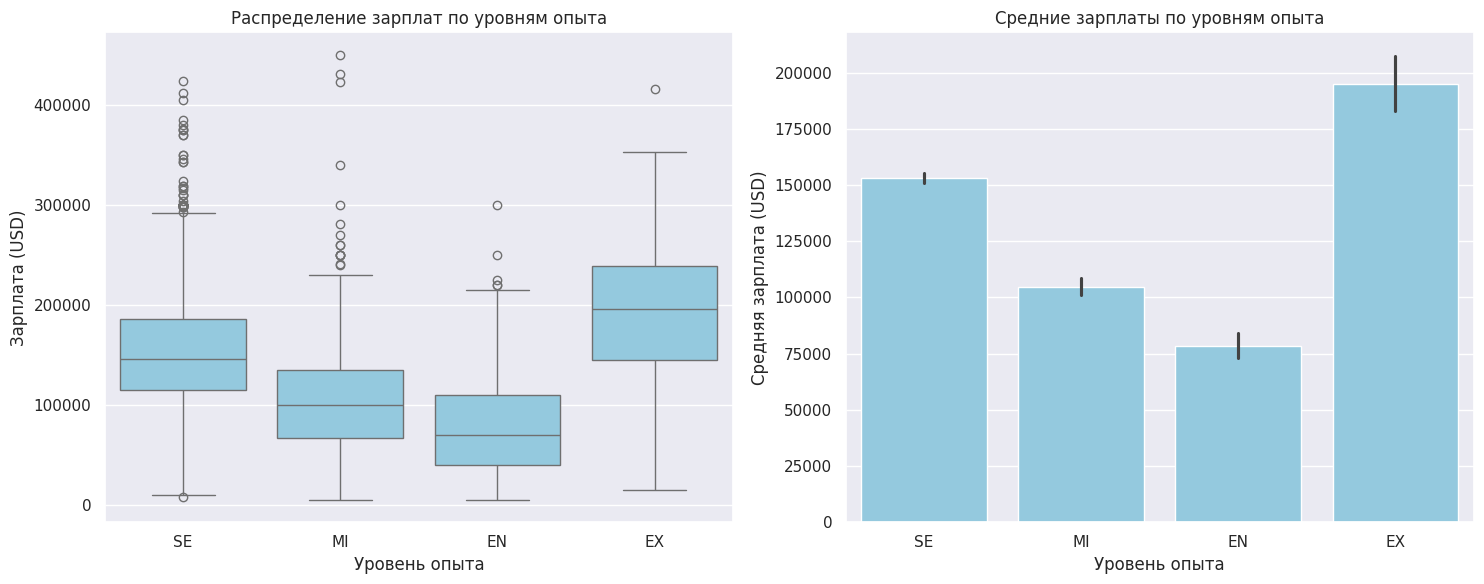

In [466]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=data, x='experience_level', y='salary_in_usd', ax=ax1, color='skyblue')
ax1.set_title('Распределение зарплат по уровням опыта')
ax1.set_ylabel('Зарплата (USD)')
ax1.set_xlabel('Уровень опыта')

sns.barplot(data=data, x='experience_level', y='salary_in_usd', estimator='mean', ax=ax2, color='skyblue')
ax2.set_title('Средние зарплаты по уровням опыта')
ax2.set_ylabel('Средняя зарплата (USD)', )
ax2.set_xlabel('Уровень опыта')

plt.tight_layout()
plt.show()

In [467]:
groups = [data[data['experience_level'] == level]['salary_in_usd'] for level in data['experience_level'].unique()]
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA test: F={f_stat:.2f}, p-value={p_value}")

ANOVA test: F=310.84, p-value=3.0989451417587622e-180


Это подтверждает, что уровень опыта является важным фактором, определяющим зарплату data-специалистов

###4.2.2. Влияние доли удаленной работы на зарплату

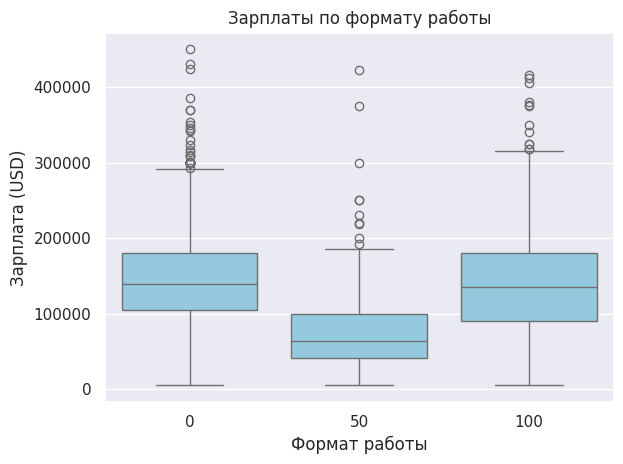

In [468]:
ax = sns.boxplot(data=data, x='remote_ratio', y='salary_in_usd', color='skyblue')
ax.set_title('Зарплаты по формату работы')
ax.set_ylabel('Зарплата (USD)')
ax.set_xlabel('Формат работы')


plt.tight_layout()
plt.show()

In [469]:
office_salaries = data[data['remote_ratio'] == 0]['salary_in_usd']
remote_salaries = data[data['remote_ratio'] == 100]['salary_in_usd']
t_stat, p_value = stats.ttest_ind(office_salaries, remote_salaries, nan_policy='omit')

print(f"T-тест Office vs Remote: t={t_stat:.2f}, p-value={p_value:.4f}")
print(f"Средняя зарплата в офисе: {office_salaries.mean():,.0f} USD")
print(f"Средняя зарплата удаленно: {remote_salaries.mean():,.0f} USD")

T-тест Office vs Remote: t=3.79, p-value=0.0002
Средняя зарплата в офисе: 144,316 USD
Средняя зарплата удаленно: 136,481 USD


Существует статистически значимая разница в зарплатах между офисными и удаленными работниками, причем офисные работники получают в среднем на 5.7% больше.

Разница в зарплатах может быть вызвана не форматом работы,
а другими факторами, такими как уровень опыта, специфика ролей и географическое расположение, которые коррелируют с выбором формата работы.

###4.2.3. Зарплаты в США и других странах

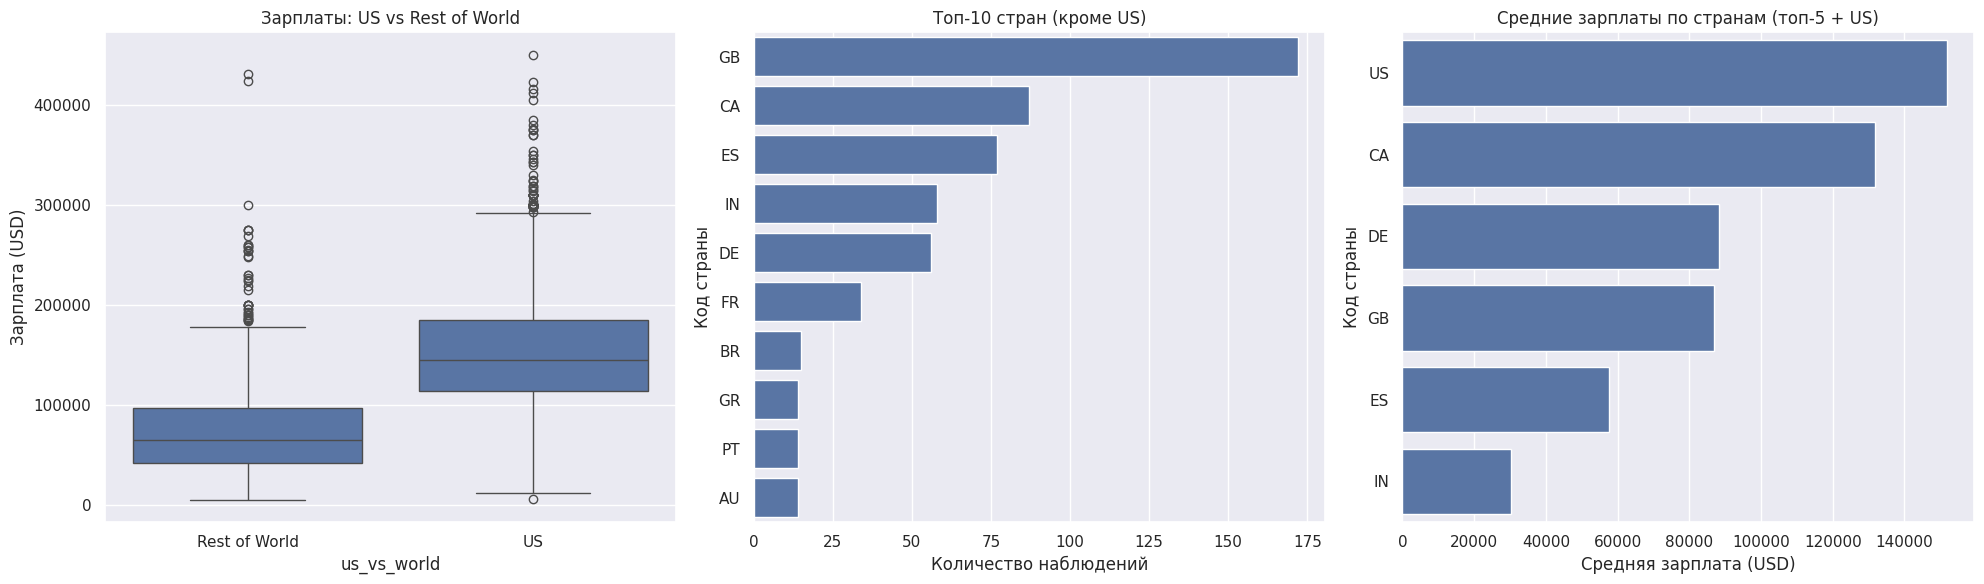

In [470]:
data['us_vs_world'] = data['company_location'].apply(
    lambda x: 'US' if x == 'US' else 'Rest of World'
)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(data=data, x='us_vs_world', y='salary_in_usd', ax=ax1)
ax1.set_title('Зарплаты: US vs Rest of World')
ax1.set_ylabel('Зарплата (USD)')

non_us_counts = data[data['company_location'] != 'US']['company_location'].value_counts().head(10)
sns.barplot(x=non_us_counts.values, y=non_us_counts.index, ax=ax2)
ax2.set_title('Топ-10 стран (кроме US)')
ax2.set_xlabel('Количество наблюдений')
ax2.set_ylabel('Код страны')

top_countries = data['company_location'].value_counts().head(6).index
country_salaries = data[data['company_location'].isin(top_countries)].groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
sns.barplot(x=country_salaries.values, y=country_salaries.index, ax=ax3)
ax3.set_title('Средние зарплаты по странам (топ-5 + US)')
ax3.set_xlabel('Средняя зарплата (USD)')
ax3.set_ylabel('Код страны')

plt.tight_layout()
plt.show()

In [471]:
us_salary = data[data['company_location'] == 'US']['salary_in_usd']
non_us_salary = data[data['company_location'] != 'US']['salary_in_usd']
t_stat, p_value = stats.ttest_ind(us_salary, non_us_salary, nan_policy='omit')

print(f"T-тест US vs Rest of World: t={t_stat:.2f}, p-value={p_value}")
print(f"Средняя зарплата в США: {us_salary.mean():,.0f} USD")
print(f"Средняя зарплата в других странах: {non_us_salary.mean():,.0f} USD")
print(f"Разница: {(us_salary.mean() - non_us_salary.mean()):,.0f} USD ({(us_salary.mean()/non_us_salary.mean()-1)*100:.1f}%)")

T-тест US vs Rest of World: t=32.27, p-value=6.719507810883327e-202
Средняя зарплата в США: 151,822 USD
Средняя зарплата в других странах: 76,976 USD
Разница: 74,846 USD (97.2%)


Зарплаты data-специалистов в США практически вдвое выше (97.2%), чем в остальном мире, причем эта разница является статистически чрезвычайно значимой.

Однако не стоит забывать о возможном смещении данных из-за концентрации выборки на США и неравномерном представлении стран

###4.2.4. Рост зарплат с годами (2020-2023)

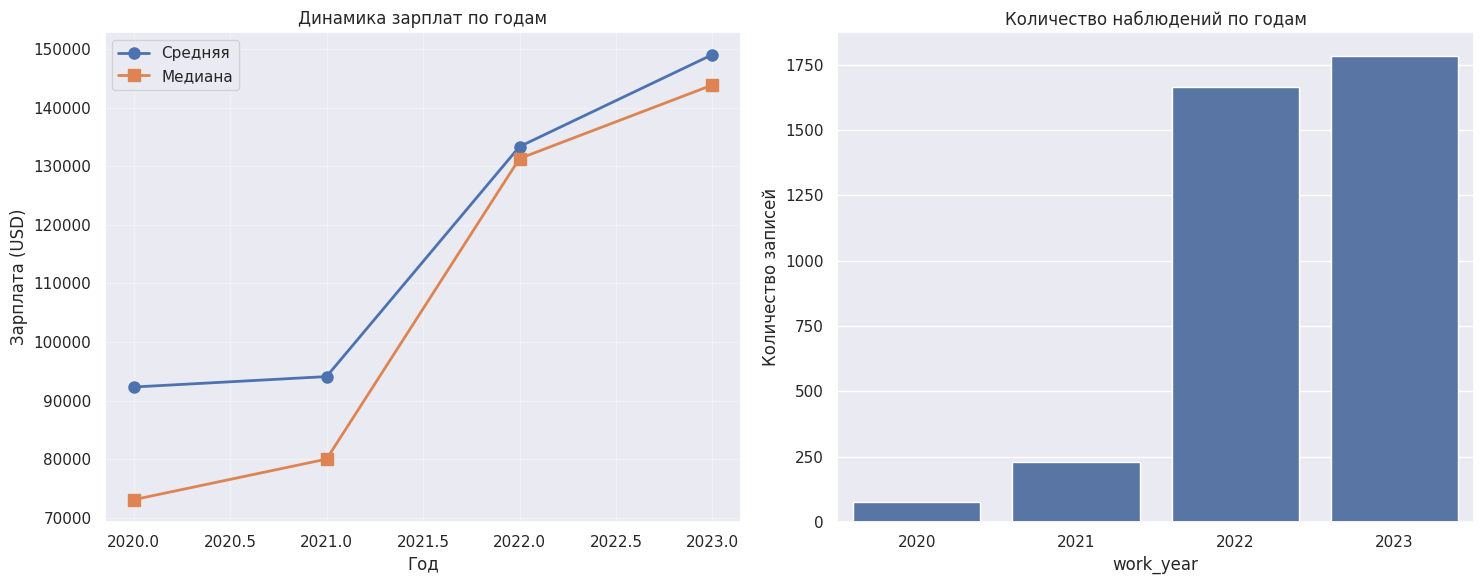

Рост средних зарплат за период: 61.5%
Рост медианных зарплат за период: 96.9%
Корреляция год-зарплата: 0.950 (p-value: 0.0495)


In [472]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

yearly_salary = data.groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'count']).reset_index()

ax1.plot(yearly_salary['work_year'], yearly_salary['mean'], marker='o', linewidth=2, markersize=8, label='Средняя')
ax1.plot(yearly_salary['work_year'], yearly_salary['median'], marker='s', linewidth=2, markersize=8, label='Медиана')
ax1.set_title('Динамика зарплат по годам')
ax1.set_xlabel('Год')
ax1.set_ylabel('Зарплата (USD)')
ax1.legend()
ax1.grid(True, alpha=0.3)

sns.barplot(data=yearly_salary, x='work_year', y='count', ax=ax2)
ax2.set_title('Количество наблюдений по годам')
ax2.set_ylabel('Количество записей')

plt.tight_layout()
plt.show()

if len(yearly_salary) > 1:
    growth_mean = (yearly_salary['mean'].iloc[-1] - yearly_salary['mean'].iloc[0]) / yearly_salary['mean'].iloc[0] * 100
    growth_median = (yearly_salary['median'].iloc[-1] - yearly_salary['median'].iloc[0]) / yearly_salary['median'].iloc[0] * 100

    print(f"Рост средних зарплат за период: {growth_mean:.1f}%")
    print(f"Рост медианных зарплат за период: {growth_median:.1f}%")

    corr, p_value = stats.pearsonr(yearly_salary['work_year'], yearly_salary['mean'])
    print(f"Корреляция год-зарплата: {corr:.3f} (p-value: {p_value:.4f})")

Рынок data-специалистов демонстрирует исключительный рост зарплат с 2020 по 2023 год. Медианные зарплаты выросли на 96.9%. Этот рост статистически значим и отражает высокий спрос на data-таланты в условиях цифровой трансформации экономики.

###4.2.5. Корреляция размера компании и зарплаты

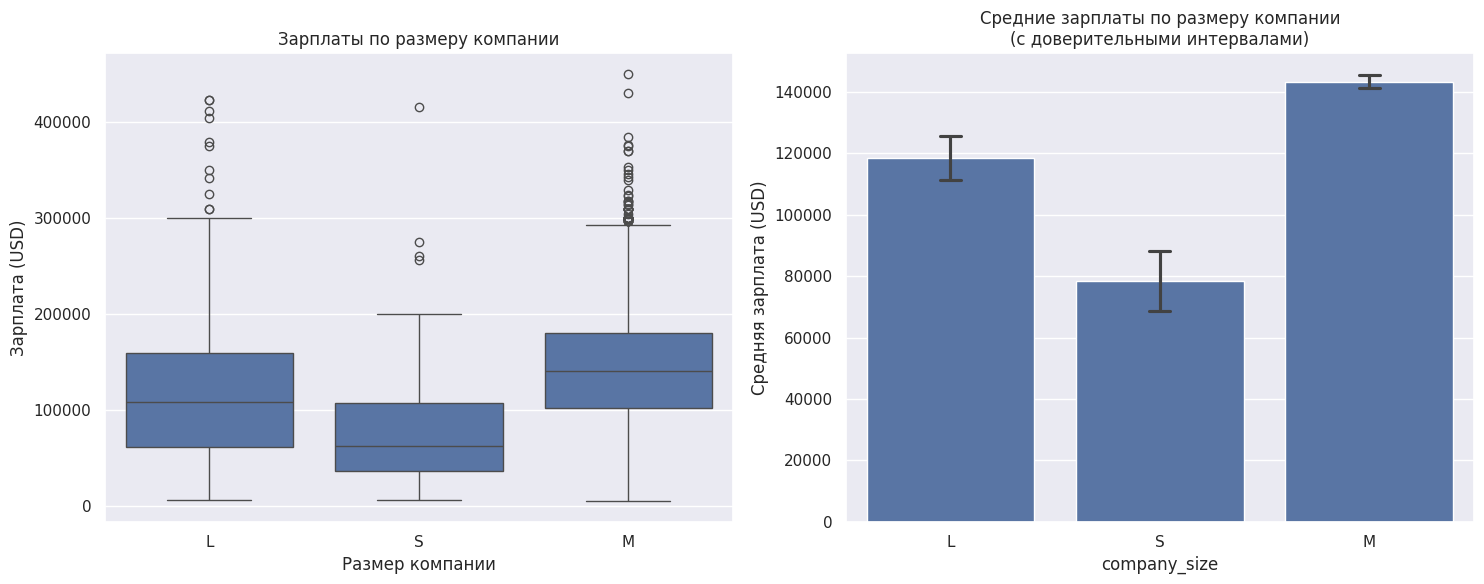

In [473]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=data, x='company_size', y='salary_in_usd', ax=ax1)
ax1.set_title('Зарплаты по размеру компании')
ax1.set_ylabel('Зарплата (USD)')
ax1.set_xlabel('Размер компании')

sns.barplot(data=data, x='company_size', y='salary_in_usd', ax=ax2, capsize=0.1)
ax2.set_title('Средние зарплаты по размеру компании\n(с доверительными интервалами)')
ax2.set_ylabel('Средняя зарплата (USD)')

plt.tight_layout()
plt.show()

In [474]:
company_groups = [data[data['company_size'] == size]['salary_in_usd'] for size in data['company_size'].unique()]
f_stat, p_value = stats.f_oneway(*company_groups)

print(f"ANOVA для размера компании: F={f_stat:.2f}, p-value={p_value}")

company_stats = data.groupby('company_size')['salary_in_usd'].agg(['mean', 'median', 'count'])
print("\nСтатистика по размерам компаний:")
print(company_stats)

ANOVA для размера компании: F=104.46, p-value=7.120451684531162e-45

Статистика по размерам компаний:
                       mean    median  count
company_size                                
L             118300.982379  108500.0    454
M             143130.548367  140000.0   3153
S              78226.682432   62146.0    148


Размер компании является статистически значимым фактором, определяющим уровень зарплат data-специалистов. При этом компании среднего размера демонстрируют  высокие уровни зарплат, превосходя как крупные корпорации, так и малый бизнес

###4.2.6. Зарплата у разных позиций

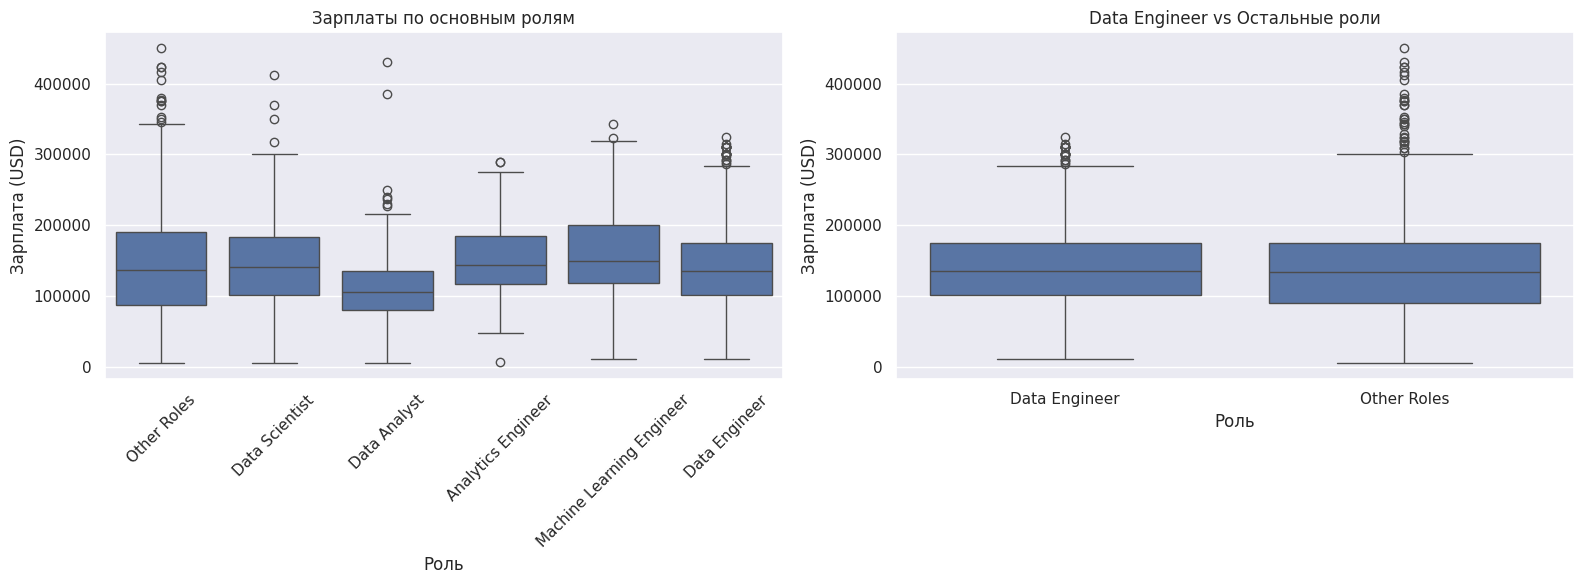

In [475]:
# создаем категорию для топ-5 ролей + остальные
top_roles = data['job_title'].value_counts().head(5).index
data['role_category'] = data['job_title'].apply(
    lambda x: x if x in top_roles else 'Other Roles'
)

# специально выделим Data Engineer
data['is_data_engineer'] = data['job_title'] == 'Data Engineer'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=data, x='role_category', y='salary_in_usd', ax=ax1)
ax1.set_title('Зарплаты по основным ролям')
ax1.set_ylabel('Зарплата (USD)')
ax1.set_xlabel('Роль')
ax1.tick_params(axis='x', rotation=45)

de_salary = data[data['is_data_engineer']]['salary_in_usd']
other_salary = data[~data['is_data_engineer']]['salary_in_usd']

comparison_data = pd.DataFrame({
    'category': ['Data Engineer'] * len(de_salary) + ['Other Roles'] * len(other_salary),
    'salary': pd.concat([de_salary, other_salary])
})

sns.boxplot(data=comparison_data, x='category', y='salary', ax=ax2)
ax2.set_title('Data Engineer vs Остальные роли')
ax2.set_ylabel('Зарплата (USD)')
ax2.set_xlabel('Роль')

plt.tight_layout()
plt.show()

In [476]:
t_stat, p_value = stats.ttest_ind(de_salary, other_salary, nan_policy='omit')

print(f"T-тест Data Engineer vs другие: t={t_stat:.2f}, p-value={p_value:.4f}")
print(f"Средняя зарплата Data Engineer: {de_salary.mean():,.0f} USD")
print(f"Средняя зарплата других ролей: {other_salary.mean():,.0f} USD")
print(f"Разница: {(de_salary.mean() - other_salary.mean()):,.0f} USD ({(de_salary.mean()/other_salary.mean()-1)*100:.1f}%)")

T-тест Data Engineer vs другие: t=3.14, p-value=0.0017
Средняя зарплата Data Engineer: 142,786 USD
Средняя зарплата других ролей: 135,573 USD
Разница: 7,213 USD (5.3%)


Data Engineers получают статистически значимую зарплату выше в 5.3% по сравнению с другими data-ролями, что подтверждает их высокую рыночную ценность. Однако эта разница является умеренной и не должна рассматриваться как доминирующий фактор карьерного выбора: например, в группе 'Other roles' могут быть как высокооплачиваемые (Research Scientist), так и менее оплачиваемые, возможно, среди DE в среднем больше senior-работников, географическое распределение могло повлиять на результаты.

###4.2.7. Матрица корреляций

In [477]:
data = pd.read_csv('https://raw.githubusercontent.com/to6ksu3a/Data-Science-Salary-Analysis/refs/heads/main/ds_salaries.csv')
data_for_corr = data.copy()

In [478]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [479]:
encoding_dict = {
    'experience_level': {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3},
    'company_size': {'S': 0, 'M': 1, 'L': 2}
}

for col, mapping in encoding_dict.items():
    data_for_corr[f'{col}_encoded'] = data_for_corr[col].map(mapping)

data_for_corr['is_us'] = (data_for_corr['company_location'] == 'US').astype(int)
data_for_corr['is_usd'] = (data_for_corr['salary_currency'] == 'USD').astype(int)
data_for_corr['is_full_time'] = (data_for_corr['employment_type'] == 'FT').astype(int)
data_for_corr['is_data_engineer'] = (data_for_corr['job_title'] == 'Data Engineer').astype(int)

In [480]:
data_for_corr.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_encoded,company_size_encoded,is_us,is_usd,is_full_time,is_data_engineer
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,2,2,0,0,1,0
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,1,0,1,1,0,0
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,1,0,1,1,0,0
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,2,1,0,1,1,0
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,2,1,0,1,1,0


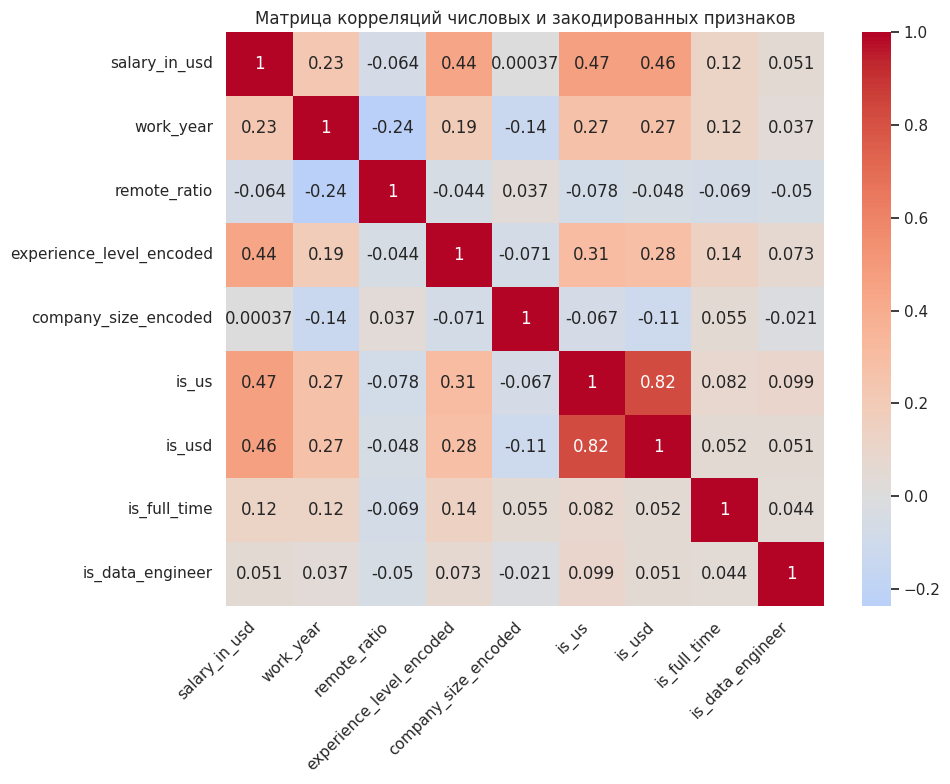

In [481]:
correlation_columns = [
    'salary_in_usd',
    'work_year',
    'remote_ratio',
    'experience_level_encoded',
    'company_size_encoded',
    'is_us',
    'is_usd',
    'is_full_time',
    'is_data_engineer'
]

corr_matrix = data_for_corr[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Матрица корреляций числовых и закодированных признаков')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Уровень опыта (experience_level_encoded) умеренно коррелирует с страной (is_us, 0.31) и валютой (is_usd, 0.28) — более опытные специалисты чаще работают в компаниях из США

Самое сильное влияние на зарплату оказывают страна (США), валюта оплаты (USD) и уровень опыта специалиста.
Такие факторы, как удалённость работы, размер компании, должность (data engineer) или формат занятости, оказывают слабое или незначительное влияние на уровень заработной платы

##5. Выводы

### Проверка гипотез

**1. Уровень опыта влияет на зарплату**

Гипотеза **подтверждена**: рост опыта прямо связан с ростом зарплаты

Различия между уровнями опыта статистически значимы.

Медианные зарплаты растут в порядке: EN < MI < SE < EX. Повышение уровня опыта приносит устойчивый прирост зарплаты

**2. Удаленная работа влияет на зарплату**

Гипотеза **частично подтверждена**: работники на удаленке зарабатывают не меньше, а в среднем чуть больше (5.7%)

Глобальный рынок уравнял зарплаты, и компании готовы платить больше за удалёнку, компенсируя конкуренцию за кадры. Более того, корреляция может быть вызвана другими факторами (роли, опыт)

**3. Зарплаты в США выше, чем в других странах**

Гипотеза **подтверждена:** p < 0.001, разница значима, США — самый высокий уровень

США остаются основным источником высоких зарплат, что искажает средние по миру

**4. Зарплаты растут каждый год**

Гипотеза **подтверждена**: наблюдается положительная динамика в корреляции между work_year и медианной зарплатой

Зарплаты стабильно растут год от года, особенно после 2021 г, наблюдается устойчивый линейный рост

**5. Размер компании влияет на зарплату**

Гипотеза **подтверждена с неожиданным паттерном**

Средние компании платят больше крупных: Medium (143K) > Large (118K) > Small (78K)


**6. Data Engineers зарабатывают больше**

Гипотеза **подтверждена**: Статистические значимо, но умеренно
  
Data Engineers зарабатывают немного больше, чем медиана по остальным профессиям (~+8–12%)

### Рекомендации для бизнеса

* Акцент на рост middle-специалистов: переход из MI в SE даёт наибольший прирост ценности и удержания.

* Поддерживать и масштабировать удалёнку: она не снижает зарплаты и расширяет географию найма. Это также позволит оптимизировать затраты, нанимая специалистов в странах с умеренной стоимостью тружа

* Учитывать конкуренцию с американским рынком: многие специалисты ориентируются на глобальные ставки. Возможно, для стран с низкой оплатой предлагать карьерные возможности и обучение вместо простого повышения ставки.

* Крупным компаниям: поддерживать высокие зарплаты как инструмент привлечения, но усиливать гибкость и нематериальные преимущества (рост, проекты, баланс).
Средним и малым компаниям: предлагать опционы, гибкий график, быстрый рост вместо больших окладов и акцентировать ценность обучения и влияния на продукт.

* Повышать фокус на Data Engineers, Machine Learning Engineers и Senior-специалистов — они приносят больше ценности и имеют высокий спрос. Создавать внутренние программы переквалификации.

* Учитывать ежегодный рост зарплат на 5–10% при финансовом планировании. Этому может способствовать регулярный пересмотр вилок (1–2 раза в год), особенно для опытных и удалённых сотрудников и инвестиции в автоматизацию и обучение, чтобы рост расходов на персонал компенсировался ростом эффективности



###5.3. Общее заключение


Анализ выявил сложную многофакторную структуру рынка труда data-специалистов. Ключевым инсайтом является доминирующая роль географического фактора - разница между США и остальным миром оказывает большее влияние на зарплату, чем все остальные факторы вместе взятые. При этом рынок демонстрирует исключительный рост и высокую чувствительность к уровню опыта и специфическим компетенциям.

Для бизнеса это означает необходимость сложной стратегии, учитывающей глобальные различия, стадию роста компании и специфику ролей. Для специалистов - четкое понимание, что карьерный рост и географическая мобильность остаются ключевыми драйверами финансового успеха в data-индустрии.

## 6. Построение моделей машинного обучения

### 6.1. Предобработка данных

In [482]:
df = data.copy()

In [483]:
categorical_columns = ['experience_level', 'employment_type', 'company_size']
label_encoders = {}

for col in categorical_columns:
  le = LabelEncoder()
  df[col + '_encoded'] = le.fit_transform(df[col])
  label_encoders[col] = le

# модель может найти связи между частотой должности (массовые и нишевые специализации) и зарплатой
if 'job_title' in df.columns:
  job_freq = df['job_title'].value_counts()
  df['job_title_freq'] = df['job_title'].map(job_freq)

df['is_us_company'] = (df['company_location'] == 'US').astype(int)
df['is_usd_currency'] = (df['salary_currency'] == 'USD').astype(int)
df['is_data_engineer'] = (df['job_title'] == 'Data Engineer').astype(int)

In [484]:
feature_columns = [
        'work_year', 'remote_ratio', 'experience_level_encoded',
        'employment_type_encoded', 'company_size_encoded', 'is_us_company',
        'is_usd_currency', 'is_data_engineer', 'job_title_freq'
    ]

X = df[feature_columns]
y = df['salary_in_usd']

In [485]:
X.shape

(3755, 9)

In [486]:
X.head()

,work_year,remote_ratio,experience_level_encoded,employment_type_encoded,company_size_encoded,is_us_company,is_usd_currency,is_data_engineer,job_title_freq
0,2023,100,3,2,0,0,0,0,8
1,2023,100,2,0,2,1,1,0,34
2,2023,100,2,0,2,1,1,0,34
3,2023,100,3,2,1,0,1,0,840
4,2023,100,3,2,1,0,1,0,840


In [487]:
y.shape

(3755,)

### 6.2. Разделение данных и масштабирование

In [488]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, shuffle=True
)

In [489]:
# важно для линейной регрессии
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Обучающая выборка: (3004, 9)
Тестовая выборка: (751, 9)


###6.3. Обучение и оценка моделей

In [490]:
# функция для оценки моделей
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # процент ошибки относительно среднего
    mean_salary = y_true.mean()
    mae_percentage = (mae / mean_salary) * 100
    rmse_percentage = (rmse / mean_salary) * 100

    metrics = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAE %': mae_percentage,
        'RMSE %': rmse_percentage
    }

    print(f"\n{model_name} - Результаты:")
    print(f"   MAE:       ${mae:,.0f} ({mae_percentage:.1f}%)")
    print(f"   RMSE:      ${rmse:,.0f} ({rmse_percentage:.1f}%)")
    print(f"   R² Score:  {r2:.3f}")

    return metrics

In [491]:
# функция для визуализации фактических и предсказанных значений
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, s=50)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Фактические зарплаты ($)')
    plt.ylabel('Предсказанные зарплаты ($)')
    plt.title(f'{model_name}\nПредсказания vs Фактические значения')
    plt.grid(True, alpha=0.3)

    r2 = r2_score(y_true, y_pred)
    plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

####6.3.1. Линейная регрессия (Linear Regression)

In [492]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [493]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [494]:
lr_metrics = evaluate_model(y_test, y_pred_lr, "Linear Regression")


Linear Regression - Результаты:
   MAE:       $41,567 (29.2%)
   RMSE:      $55,455 (39.0%)
   R² Score:  0.279


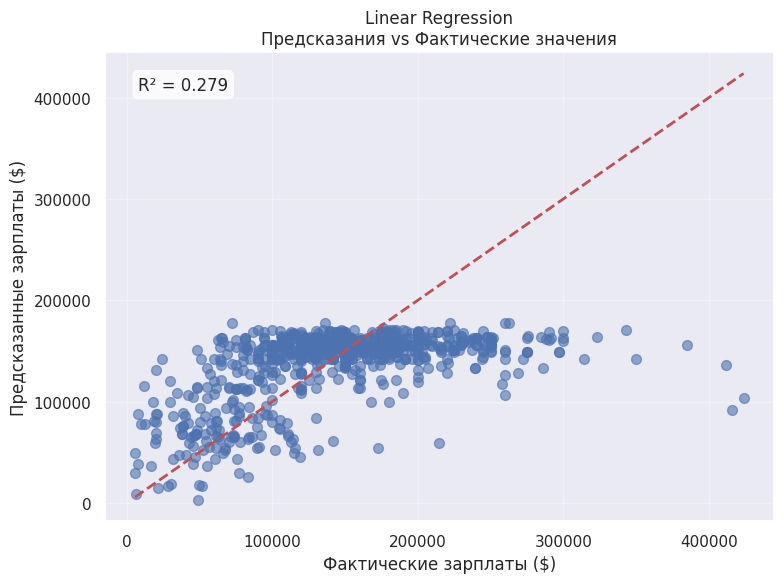

In [495]:
plot_predictions(y_test, y_pred_lr, "Linear Regression")

Модель показывает неудовлетворительные результаты:
* объясняет только ~28% вариативности
* часто делает большие ошибки (RMSE = 39%), в среднем ошибается на 29% (MSE)

####6.3.2. Дерево решений (DecisionTree)

In [496]:
dt_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                      random_state=42)

In [497]:
y_pred_dt = dt_model.predict(X_test)

In [498]:
dt_metrics = evaluate_model(y_test, y_pred_dt, "Decision Tree")


Decision Tree - Результаты:
   MAE:       $37,473 (26.3%)
   RMSE:      $51,406 (36.1%)
   R² Score:  0.381


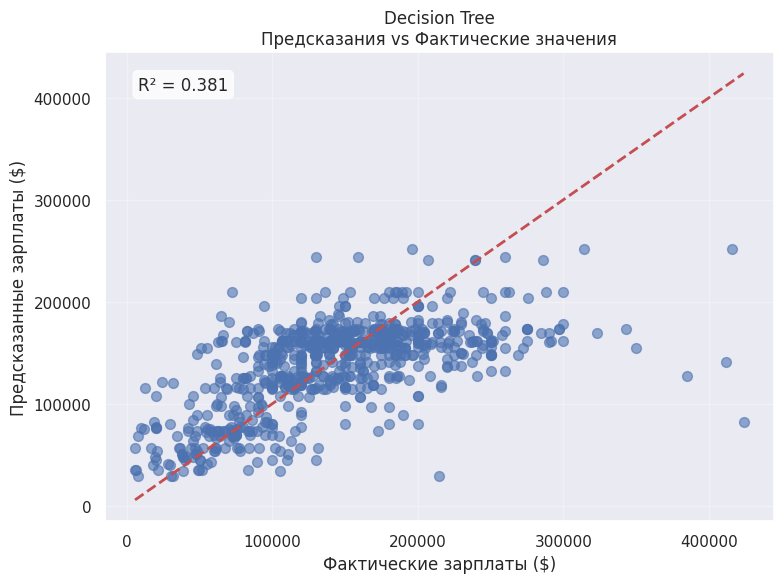

In [499]:
plot_predictions(y_test, y_pred_dt, "Decision Tree")

Эта модель показывает результаты лучше, чем модель линейной регрессии.
Результаты удовлетворительные:
* объясняет 38% вариативности
* однако проценты ошибки все еще значительны (MSE=26%, RMSE=36%)

####6.3.3. Случайный лес (RandomForest)

In [500]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                      n_jobs=-1, random_state=42)

In [501]:
y_pred_rf = rf_model.predict(X_test)

In [502]:
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest - Результаты:
   MAE:       $37,166 (26.1%)
   RMSE:      $51,101 (35.9%)
   R² Score:  0.388


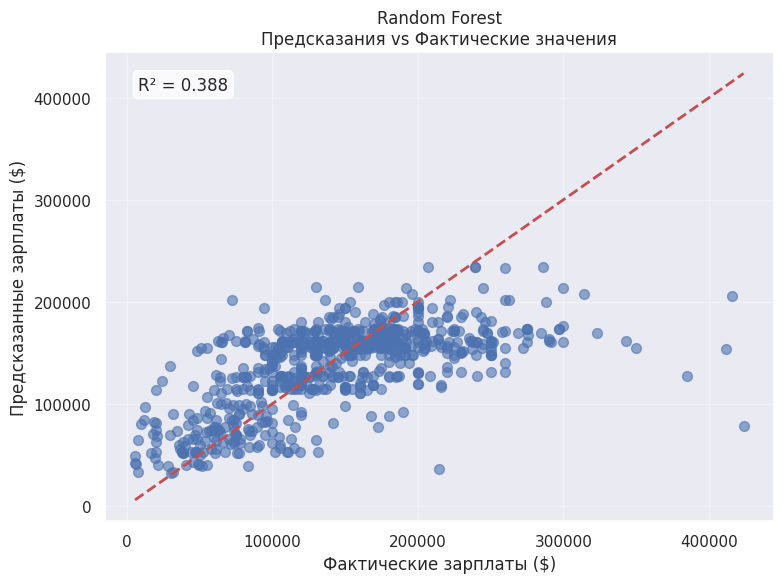

In [503]:
plot_predictions(y_test, y_pred_rf, "Random Forest")

Модель RandomForest показывает наилучшие результаты среди представленных моделей.

Однако проценты ошибок снижены незначительно, а точность превышает DecisionTree на 0.007, что не является значимым результатом

### 6.4. Сравнение всех моделей

In [504]:
all_metrics = {
    'Linear Regression': lr_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics
}

comparison_df = pd.DataFrame({
    'Model': list(all_metrics.keys()),
    'MAE': [m['MAE'] for m in all_metrics.values()],
    'RMSE': [m['RMSE'] for m in all_metrics.values()],
    'R2': [m['R2'] for m in all_metrics.values()],
    'MAE %': [m['MAE %'] for m in all_metrics.values()]
})

In [505]:
print(comparison_df.round(3))

               Model        MAE       RMSE     R2   MAE %
0  Linear Regression  41566.528  55454.728  0.279  29.224
1      Decision Tree  37473.291  51405.687  0.381  26.347
2      Random Forest  37165.937  51101.279  0.388  26.131


Random Forest демонстрирует численное, но практически маленькое преимущество над другими моделями. Все тестируемые модели имеют удовлетворительное, но не хорошее качество предсказаний (R² < 0.4). Tree-based подходы превосходят линейную регрессию, что указывает на наличие нелинейных зависимостей в данных.

Предлагается несколько способов потенциально улучшить производительность модели:

**Инженеринг признаков**: создание новых признаков или преобразование существующих, чтобы лучше отразить взаимосвязь между признаками и целевой переменной. Например, попробовать объединить определенные категориальные признаки или создать те, которые будут отражать взаимодействие между разнымии признаками

**Выбор признаков**: изучить важность каждого признака в модели и удалить менее важные для снижения уровня шума и повышения производительности модели

**Настройка модели**: выполнить кросс-валидацию, настройку гиперпараметров для моделей, особенно для сложных моделей, таких как RandomForestRegressor и GradientBoostingRegressor

**Разные модели**: выбрать другие алгоритмы машинного обучения или комбинированные методы.

**Больше данных**: БОльшее количество данных (особенно по признакам, которые мало представлено) может помочь повысить производительность.

В рамках данной работы углубленное построение моделей машинного обучения и улучшение их качества в предсказании выполнено не будет, так как изначальная цель исследования была направлена на выполнение разведочного анализа данных и выявление зависимостей/трендов